

```
# This is formatted as code
```

# X. Inference

## Import Libraries

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from google.colab import drive
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import register_keras_serializable

## Data Loading

In [2]:
# Redefine focal_loss
@register_keras_serializable()
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        focal_loss = -y_true * alpha * tf.math.pow(1 - y_pred, gamma) * tf.math.log(y_pred) \
                     - (1 - y_true) * (1 - alpha) * tf.math.pow(y_pred, gamma) * tf.math.log(1 - y_pred)
        return tf.reduce_mean(focal_loss)
    return focal_loss_fixed

In [4]:
drive.mount('/content/drive')
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/p2-ftds027-hck-g7-farrashv8/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset from Kaggle
!kaggle datasets download -d pacificrm/car-insurance-fraud-detection

# Unzip file
!unzip -q car-insurance-fraud-detection.zip

# Load Model
model_finetuned = load_model('/content/drive/My Drive/p2-ftds027-hck-g7-farrashv8/model.keras',
                             custom_objects={'focal_loss_fixed': focal_loss()})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/pacificrm/car-insurance-fraud-detection
License(s): CC0-1.0
car-insurance-fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
replace Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Fraud/1028.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
All


## Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


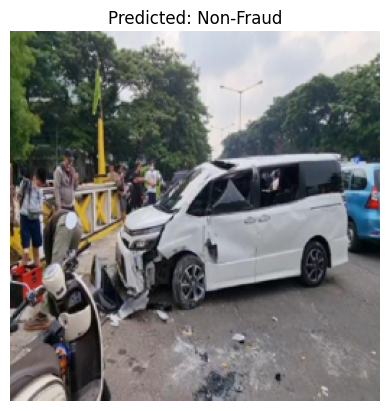

In [7]:
# Inference Function
def predict_and_display(image_path, model_path):

    # Load dan convert image path to array
    image = Image.open(image_path)
    image = image.resize((256, 256))  # Resize to match model input
    image_array = np.array(image) / 255.0  # Normalize to [0, 1]

    # Load threshold
    threshold_path = '/content/drive/My Drive/p2-ftds027-hck-g7-farrashv8/best_threshold'
    with open(threshold_path, 'r') as f:
      threshold_data = json.load(f)
    best_threshold = threshold_data['threshold']

    # Expand dimension
    input_array = np.expand_dims(image_array, axis=0)

    # Predict
    prediction = model_finetuned.predict(input_array)

    # Get the class
    predicted_class = int(prediction.ravel()[0] >= best_threshold)

    # Define the Class Names
    class_names = ['Fraud', 'Non-Fraud']

    # Predicted Result
    predicted_label = class_names[predicted_class]

    # Visualisasi
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

    return

predict_and_display(
    image_path='/content/drive/My Drive/p2-ftds027-hck-g7-farrashv8/Inference Sample/Non-Fraud/images008.jpg', #'/content/Insurance-Fraud-Detection/Insurance-Fraud-Detection/test/Non-Fraud/1039.jpg' Example using test data from kaggle
    model_path='/content/drive/My Drive/p2-ftds027-hck-g7-farrashv8/fine_tune.keras')

# XI. Summary

In the insurance industry, fraudulent claims lead to significant financial losses and reduces trust in the claims process. To address this, By leveraging the InceptionResNetV2 architecture and applying transfer learning with fine-tuning, the model was trained on a labeled dataset of genuine and fraudulent claim images. Key performance metrics such as F1-score, recall, and PR-AUC were prioritized, especially for the minority (fraudulent) class due to the data imbalance.


These results demonstrate a strong ability to identify fraudulent cases while maintaining excellent performance on legitimate ones. This solution supports cost reduction, risk mitigation, and faster claims processing, ultimately enhancing the efficiency and integrity of the insurance workflow.